## **Title:** **Machine Learning-Based Classification of Blood Cancer Types from Microarray Data**
##### **Data structure:** Microarray Data gene expression
#####  Preprocessing of microarray data performed using R packages
##### **The sape of dataset:** Samples: 871 & Genes: 6188

### Work Pipeline: 
##### 1. Drop Unnecessary columns
##### 2. Encode Categorical Variables: (One-Hot Encoding)
##### 3. Feature Scaling: Standardization: Scale features to have a mean of 0 and a standard deviation of 1.
##### 4. Reduce the dimensionality: PCA
##### 5. Split the Data: Split the dataset into training and testing sets to evaluate the models (80% & 20%)
##### 6. Feature Selection
##### 7. Learning algorithm: SVM & RF
##### 8. Evaluation of the model


In [1]:
# Importing the libraries:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
# Import dataset:
# Final Merged final of all 7 datasets after Batch Correction
df = pd.read_csv("Final_corrected_data_transposed.csv")
df.head()

,Unnamed: 0,Sample.ID,GUCA1A,PTPN21,SCARB1,MAPK1,MAPK1.1,EYA3,ARMCX4,RBBP6,...,RBM12B,PAOX.1,ITIH4.1,CUL7.1,TRAFD1.1,MIR6883.....PER1.1,ACTB.3,STAT1.2,STAT1.3,Main.type
0,1,GSM1237956,4.247226,4.113757,5.788091,6.329030,7.106397,4.421937,3.476978,7.509007,...,4.201840,5.746842,4.676414,5.064268,4.043317,6.099811,12.360109,9.860044,5.290689,Leukemia
1,2,GSM1237957,4.307984,3.967577,7.062449,6.797795,7.562505,5.604161,3.971616,7.195744,...,5.339834,5.528543,4.664954,5.235082,5.129950,5.313248,11.572177,9.638192,5.577929,Leukemia
2,3,GSM1237958,3.263157,4.065945,5.995109,5.955283,8.345784,5.036640,3.161907,5.728063,...,5.291897,5.218780,4.411400,4.917134,6.205758,5.008346,13.284637,9.746704,5.875882,Leukemia
3,4,GSM1237959,3.302438,3.752796,6.986376,4.355601,7.644123,5.587867,3.470449,8.162722,...,5.955245,6.443077,3.797879,4.224734,4.209789,5.466332,12.634460,9.841567,5.014621,Leukemia
4,5,GSM1237960,3.684183,4.025285,6.677405,6.000011,6.875231,5.816012,3.569352,6.171904,...,5.659265,5.520937,4.441376,5.089002,4.573812,6.394558,11.730000,9.040460,4.818639,Leukemia


### Data Preprocessing Steps¶

In [5]:
# Drop Unnamed: 0: unncessary column 
df.drop("Unnamed: 0", axis=1, inplace= True)
df.head()

,Sample.ID,GUCA1A,PTPN21,SCARB1,MAPK1,MAPK1.1,EYA3,ARMCX4,RBBP6,TRIOBP,...,RBM12B,PAOX.1,ITIH4.1,CUL7.1,TRAFD1.1,MIR6883.....PER1.1,ACTB.3,STAT1.2,STAT1.3,Main.type
0,GSM1237956,4.247226,4.113757,5.788091,6.329030,7.106397,4.421937,3.476978,7.509007,6.565748,...,4.201840,5.746842,4.676414,5.064268,4.043317,6.099811,12.360109,9.860044,5.290689,Leukemia
1,GSM1237957,4.307984,3.967577,7.062449,6.797795,7.562505,5.604161,3.971616,7.195744,6.931375,...,5.339834,5.528543,4.664954,5.235082,5.129950,5.313248,11.572177,9.638192,5.577929,Leukemia
2,GSM1237958,3.263157,4.065945,5.995109,5.955283,8.345784,5.036640,3.161907,5.728063,7.438263,...,5.291897,5.218780,4.411400,4.917134,6.205758,5.008346,13.284637,9.746704,5.875882,Leukemia
3,GSM1237959,3.302438,3.752796,6.986376,4.355601,7.644123,5.587867,3.470449,8.162722,6.383596,...,5.955245,6.443077,3.797879,4.224734,4.209789,5.466332,12.634460,9.841567,5.014621,Leukemia
4,GSM1237960,3.684183,4.025285,6.677405,6.000011,6.875231,5.816012,3.569352,6.171904,5.807413,...,5.659265,5.520937,4.441376,5.089002,4.573812,6.394558,11.730000,9.040460,4.818639,Leukemia


In [7]:
print(f"The shape of dataset: {df.shape}")
print(df.duplicated().sum())
print(df.isnull().sum().sum())

The shape of dataset: (871, 6190)
0
0


In [13]:
print(f"Class Distribution:\n{df['Main.type'].value_counts()}")           

Class Distribution:
Main.type
Multiple Myeloma    300
Leukemia            286
Lymphoma            285
Name: count, dtype: int64


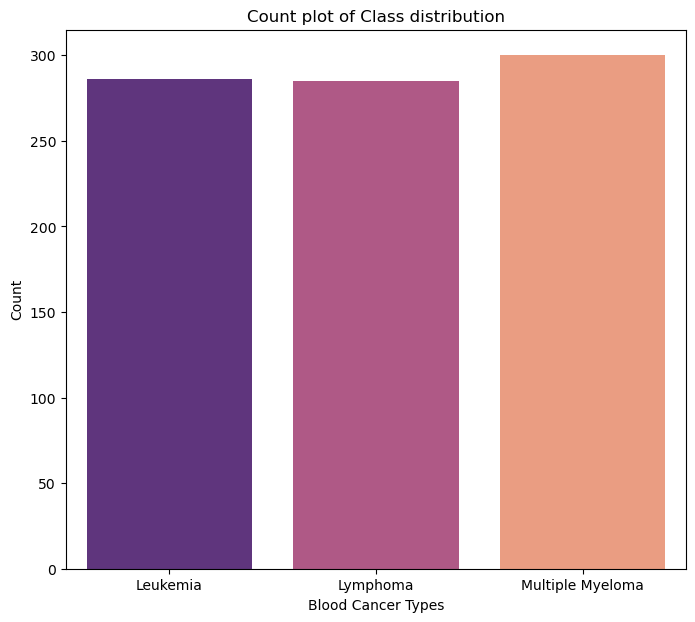

In [15]:
# Visulaize the Class distribution: countplot
plt.figure(figsize = (8,7))
sns.countplot(x="Main.type", data=df, palette='magma', hue='Main.type', alpha=0.9)
plt.title('Count plot of Class distribution')
plt.xlabel("Blood Cancer Types")
plt.ylabel("Count")
#plt.legend()
plt.show()

In [9]:
# Drop sample ID: unncessary feature 
df_cleaned = df.drop("Sample.ID", axis=1)
df_cleaned.head()

,GUCA1A,PTPN21,SCARB1,MAPK1,MAPK1.1,EYA3,ARMCX4,RBBP6,TRIOBP,CNOT7,...,RBM12B,PAOX.1,ITIH4.1,CUL7.1,TRAFD1.1,MIR6883.....PER1.1,ACTB.3,STAT1.2,STAT1.3,Main.type
0,4.247226,4.113757,5.788091,6.329030,7.106397,4.421937,3.476978,7.509007,6.565748,6.379447,...,4.201840,5.746842,4.676414,5.064268,4.043317,6.099811,12.360109,9.860044,5.290689,Leukemia
1,4.307984,3.967577,7.062449,6.797795,7.562505,5.604161,3.971616,7.195744,6.931375,6.522071,...,5.339834,5.528543,4.664954,5.235082,5.129950,5.313248,11.572177,9.638192,5.577929,Leukemia
2,3.263157,4.065945,5.995109,5.955283,8.345784,5.036640,3.161907,5.728063,7.438263,6.117916,...,5.291897,5.218780,4.411400,4.917134,6.205758,5.008346,13.284637,9.746704,5.875882,Leukemia
3,3.302438,3.752796,6.986376,4.355601,7.644123,5.587867,3.470449,8.162722,6.383596,7.265040,...,5.955245,6.443077,3.797879,4.224734,4.209789,5.466332,12.634460,9.841567,5.014621,Leukemia
4,3.684183,4.025285,6.677405,6.000011,6.875231,5.816012,3.569352,6.171904,5.807413,6.125498,...,5.659265,5.520937,4.441376,5.089002,4.573812,6.394558,11.730000,9.040460,4.818639,Leukemia


In [11]:
# Apply one hot encoding to transform the categorical variables into numerical format
LE = LabelEncoder()
df_cleaned['Main.type'] = pd.DataFrame(LE.fit_transform(df_cleaned['Main.type']))
df_cleaned.head()    

,GUCA1A,PTPN21,SCARB1,MAPK1,MAPK1.1,EYA3,ARMCX4,RBBP6,TRIOBP,CNOT7,...,RBM12B,PAOX.1,ITIH4.1,CUL7.1,TRAFD1.1,MIR6883.....PER1.1,ACTB.3,STAT1.2,STAT1.3,Main.type
0,4.247226,4.113757,5.788091,6.329030,7.106397,4.421937,3.476978,7.509007,6.565748,6.379447,...,4.201840,5.746842,4.676414,5.064268,4.043317,6.099811,12.360109,9.860044,5.290689,0
1,4.307984,3.967577,7.062449,6.797795,7.562505,5.604161,3.971616,7.195744,6.931375,6.522071,...,5.339834,5.528543,4.664954,5.235082,5.129950,5.313248,11.572177,9.638192,5.577929,0
2,3.263157,4.065945,5.995109,5.955283,8.345784,5.036640,3.161907,5.728063,7.438263,6.117916,...,5.291897,5.218780,4.411400,4.917134,6.205758,5.008346,13.284637,9.746704,5.875882,0
3,3.302438,3.752796,6.986376,4.355601,7.644123,5.587867,3.470449,8.162722,6.383596,7.265040,...,5.955245,6.443077,3.797879,4.224734,4.209789,5.466332,12.634460,9.841567,5.014621,0
4,3.684183,4.025285,6.677405,6.000011,6.875231,5.816012,3.569352,6.171904,5.807413,6.125498,...,5.659265,5.520937,4.441376,5.089002,4.573812,6.394558,11.730000,9.040460,4.818639,0


In [29]:
# Label Distribution
print(df_cleaned["Main.type"].unique() ) 
print("-"*50)
print(f"Class Distribution:\n{df_cleaned['Main.type'].value_counts()}")     # 0:Leukemia, 1: Lymphoma, 2: MM       

[0 1 2]
--------------------------------------------------
Class Distribution:
Main.type
2    300
0    286
1    285
Name: count, dtype: int64


In [13]:
X = df_cleaned.drop('Main.type', axis=1)      # feature
y = df_cleaned['Main.type']                   # label
X.head()

,GUCA1A,PTPN21,SCARB1,MAPK1,MAPK1.1,EYA3,ARMCX4,RBBP6,TRIOBP,CNOT7,...,ZNF710.1,RBM12B,PAOX.1,ITIH4.1,CUL7.1,TRAFD1.1,MIR6883.....PER1.1,ACTB.3,STAT1.2,STAT1.3
0,4.247226,4.113757,5.788091,6.329030,7.106397,4.421937,3.476978,7.509007,6.565748,6.379447,...,5.055272,4.201840,5.746842,4.676414,5.064268,4.043317,6.099811,12.360109,9.860044,5.290689
1,4.307984,3.967577,7.062449,6.797795,7.562505,5.604161,3.971616,7.195744,6.931375,6.522071,...,4.260134,5.339834,5.528543,4.664954,5.235082,5.129950,5.313248,11.572177,9.638192,5.577929
2,3.263157,4.065945,5.995109,5.955283,8.345784,5.036640,3.161907,5.728063,7.438263,6.117916,...,4.597166,5.291897,5.218780,4.411400,4.917134,6.205758,5.008346,13.284637,9.746704,5.875882
3,3.302438,3.752796,6.986376,4.355601,7.644123,5.587867,3.470449,8.162722,6.383596,7.265040,...,5.412031,5.955245,6.443077,3.797879,4.224734,4.209789,5.466332,12.634460,9.841567,5.014621
4,3.684183,4.025285,6.677405,6.000011,6.875231,5.816012,3.569352,6.171904,5.807413,6.125498,...,4.421429,5.659265,5.520937,4.441376,5.089002,4.573812,6.394558,11.730000,9.040460,4.818639


In [15]:
# Standardization 

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_scaled.head()                        

,GUCA1A,PTPN21,SCARB1,MAPK1,MAPK1.1,EYA3,ARMCX4,RBBP6,TRIOBP,CNOT7,...,ZNF710.1,RBM12B,PAOX.1,ITIH4.1,CUL7.1,TRAFD1.1,MIR6883.....PER1.1,ACTB.3,STAT1.2,STAT1.3
0,0.402375,-0.172208,-1.426891,-0.173231,-0.088861,-0.653317,0.056137,1.182046,-0.485237,-0.043004,...,1.081585,-0.859480,0.320863,0.020678,-0.021461,-1.451193,0.542869,-0.240171,0.556356,0.296741
1,0.465548,-0.602238,0.458183,0.383918,0.488324,0.855142,1.301391,0.870254,0.261534,0.120058,...,-0.491271,0.263627,0.030375,-0.005978,0.306044,0.210432,-0.461569,-1.199313,0.372058,0.571225
2,-0.620818,-0.312860,-1.120662,-0.617448,1.479529,0.131013,-0.737056,-0.590533,1.296819,-0.342012,...,0.175409,0.216317,-0.381823,-0.595733,-0.303568,1.855504,-0.850927,0.885247,0.462201,0.855948
3,-0.579975,-1.234081,0.345654,-2.518749,0.591608,0.834352,0.039698,1.832690,-0.857270,0.969491,...,1.787286,0.870988,1.247337,-2.022754,-1.631129,-1.196632,-0.266081,0.093793,0.541007,0.032933
4,-0.183053,-0.432474,-0.111386,-0.564287,-0.381391,1.125455,0.288688,-0.148776,-2.034086,-0.333344,...,-0.172214,0.578879,0.020254,-0.526010,0.025961,-0.639987,0.919258,-1.007197,-0.124496,-0.154347


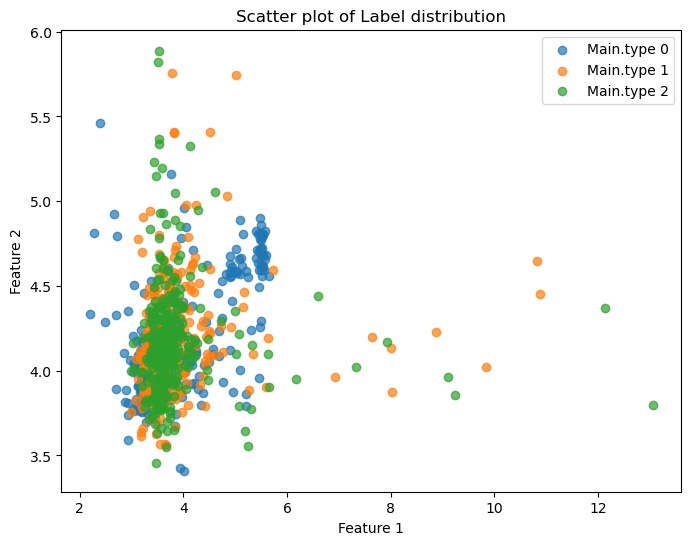

In [35]:
# Check the balance of label distribution

plt.figure(figsize=(8,6))
for label in df_cleaned['Main.type'].unique():
    subset = df_cleaned[df_cleaned['Main.type'] == label]
    plt.scatter(subset['GUCA1A'], subset['PTPN21'], label=(f"Main.type {label}"), alpha=0.7)
    
plt.title('Scatter plot of Label distribution')
plt.xlabel("Feature 1")
plt.ylabel('Feature 2')
plt.legend()
plt.show()   

### Train the models on all X_train "without" feature selection 
### Train Test Split: Training data: 80% & Testing data: 20%

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

#### 1-Train Random Forest Classifier without FS:

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        57
           1       0.98      1.00      0.99        55
           2       0.82      1.00      0.90        63

    accuracy                           0.91       175
   macro avg       0.93      0.91      0.91       175
weighted avg       0.93      0.91      0.91       175



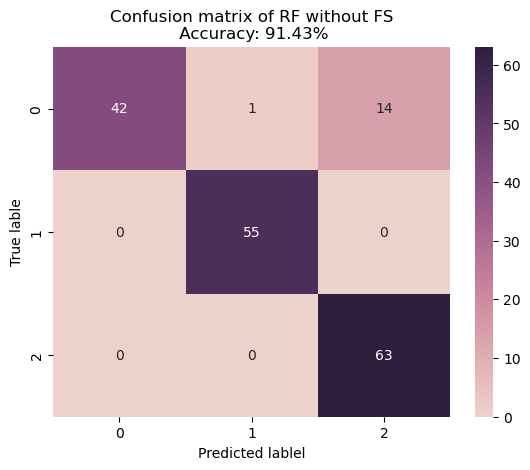



Classification Metrics of RF model without FS method:

Accuracy: 91.43%
Precision: 92.89%
Recall: 91.43%
F1 score: 91.18%


In [45]:
rfc_without = RandomForestClassifier(random_state=42)
rfc_without.fit(X_train, y_train)
y_pred_rfc = rfc_without.predict(X_test)

# Evaluate the Model:
print(f'Classification Report:\n {classification_report(y_test, y_pred_rfc)}')
# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred_rfc)
# Plot the CM
sns.heatmap(cm, annot=True, fmt='d',cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(f'Confusion matrix of RF without FS\n Accuracy: {accuracy_score(y_test, y_pred_rfc)*100:0.2f}%')
plt.xlabel('Predicted lablel')
plt.ylabel('True lable')
plt.show()

print("\n")
print("Classification Metrics of RF model without FS method:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rfc)*100:0.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_rfc, average='weighted')*100:0.2f}%")  # Use 'weighted' for 'multi-class' classification
print(f"Recall: {recall_score(y_test, y_pred_rfc,  average='weighted')*100:0.2f}%")
print(f"F1 score: {f1_score(y_test, y_pred_rfc,  average='weighted')*100:0.2f}%")

#### ________________________________________________________________________________

#### 2-Trian Support Vector Machine classifier (SVM) without FS:

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        57
           1       0.95      0.95      0.95        55
           2       0.81      1.00      0.89        63

    accuracy                           0.90       175
   macro avg       0.92      0.89      0.90       175
weighted avg       0.91      0.90      0.90       175



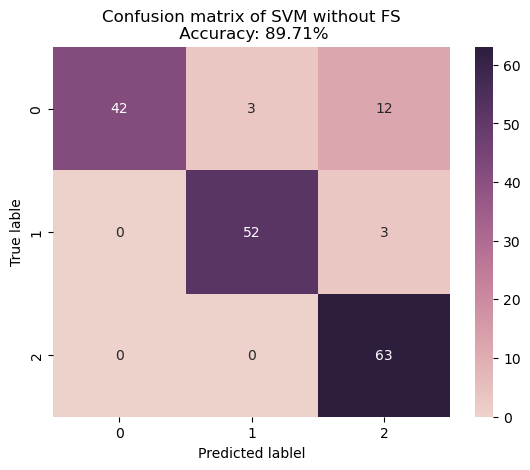



Classification Metrics of SVM model without FS method:

Accuracy: 89.71%
Precision: 91.36%
Recall: 89.71%
F1 score: 89.52%


In [51]:
svc_without = SVC(kernel="rbf")
svc_without.fit(X_train, y_train)
y_pred_svc = svc_without.predict(X_test)

# Evaluate the Model:
print(f'Classification Report:\n {classification_report(y_test, y_pred_svc)}')
# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred_svc)
# Plot the CM
sns.heatmap(cm, annot=True, fmt='d',cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(f'Confusion matrix of SVM without FS\n Accuracy: {accuracy_score(y_test, y_pred_svc)*100:0.2f}%')
plt.xlabel('Predicted lablel')
plt.ylabel('True lable')
plt.show()

print("\n")
print("Classification Metrics of SVM model without FS method:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)*100:0.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='weighted')*100:0.2f}%")  # Use 'weighted' for 'multi-class' classification
print(f"Recall: {recall_score(y_test, y_pred_svc,  average='weighted')*100:0.2f}%")
print(f"F1 score: {f1_score(y_test, y_pred_svc,  average='weighted')*100:0.2f}%")

In [82]:
# Comparsion between the accuracy of RF and SVM
print(f"The accuracy of RF Model without FS is: {accuracy_score(y_test, y_pred_rfc)*100:.2f}%")
print(f"The accuracy of SVM Model without FS is: {accuracy_score(y_test, y_pred_svc)*100:.2f}%")

The accuracy of RF Model without FS is: 91.43%
The accuracy of SVM Model without FS is: 89.71%


### ____________________________________________________________________________________

### Trian the models with Feature selection method

#### Handeling the Curse of dimensionality problem: Principle components analysis (PCA)

Text(0, 0.5, 'Variance Ratio')

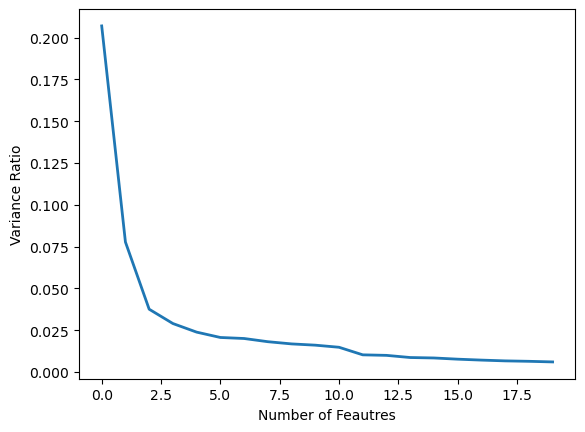

In [17]:
# PCA and fitting
n_components_range = 20
pca = PCA(n_components=n_components_range)
pca.fit(x_scaled)

# Visualize how variance differs across feature space
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [19]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x_scaled, y) 
print(pca.explained_variance_ratio_)

[0.20694176 0.07775926 0.03759533 0.02902967 0.02389347 0.02069317
 0.02008395 0.01816845 0.01685072 0.01609783]


### Tain Test Split: Training data: 80% & Testing data: 20%

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [22]:
# Shape of train and test data (x_train, x_test)
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (696, 10)
Shape of test set: (175, 10)


### Feature Selection:
#### 1- Recursive Feature Elimination (Combine RFE with Grid Search to optimize RF parameters)

In [61]:
# Build Model: Random forest classifier
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, step=0.5)  # Feature selection method

# Grid Search Parameters
param_grid = {
    'estimator__n_estimators': [50, 100, 200],  
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'n_features_to_select': [5, 10, 20, 25]  # RFE parameter
}


grid_search = GridSearchCV(
    estimator=rfe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Evaluate the Model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Parameters: {'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 50, 'n_features_to_select': 10}


### Evaluation parameters

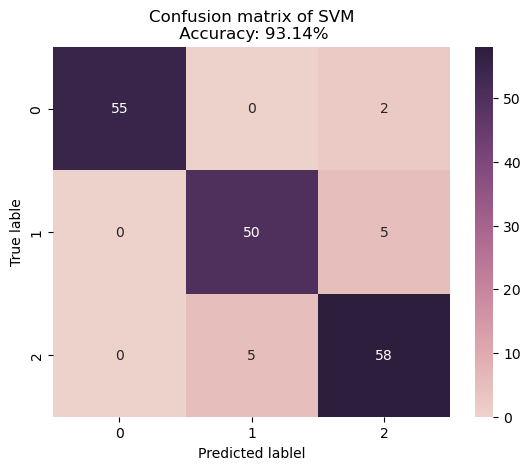

Classification Metrics of SVM model:

Accuracy: 93.14%
Precision: 93.27%
Recall: 93.14%
F1 score: 93.19%


In [65]:
# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Plot the CM
sns.heatmap(cm, annot=True, fmt='d',cmap=sns.cubehelix_palette(as_cmap=True))         
plt.title(f'Confusion matrix of SVM\n Accuracy: {accuracy_score(y_test, y_pred)*100:0.2f}%')
plt.xlabel('Predicted lablel')
plt.ylabel('True lable')
plt.show()

print("Classification Metrics of SVM model:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:0.2f}%")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')*100:0.2f}%")  # Use 'weighted' for 'multi-class' classification
print(f"Recall: {recall_score(y_test, y_pred,  average='weighted')*100:0.2f}%")
print(f"F1 score: {f1_score(y_test, y_pred,  average='weighted')*100:0.2f}%")

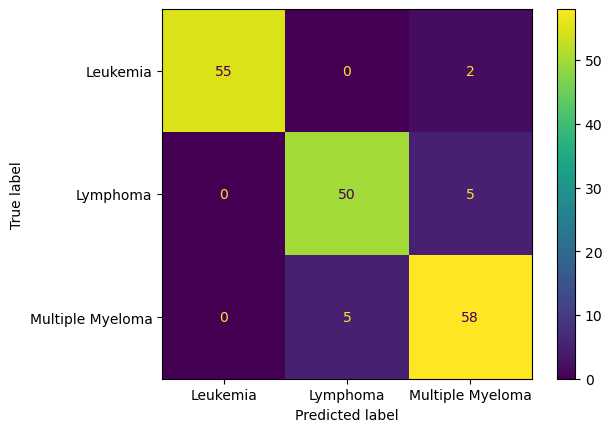

In [67]:
# confusion matriux  plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Leukemia', 'Lymphoma', "Multiple Myeloma"]) # 0:Leukemia, 1: Lymphoma, 2: MM 
disp.plot()
plt.show()

In [33]:
# SVR model
svr = SVC()
rfe = RFE(estimator=svr, step=0.5)  # Feature selection method

# Grid search parameters
param_grid = {
    'estimator__kernel': ['linear','rbf'],  # kernel type
    'estimator__C': [0.1, 1, 10, 100],                # Regularization parameter
    'n_features_to_select': [5,10, 20, 25],  # RFE parameter
}
grid_search = GridSearchCV(rfe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

Best parameters from Grid Search: {'estimator__C': 10, 'estimator__kernel': 'rbf', 'n_features_to_select': 10}


/home/manar-samir/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/manar-samir/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/manar-samir/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/manar-samir/anaconda3/lib/python3.12/site-packages/sklearn/fea

### Evaluation parameters

Classification Metrics of SVM model:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.89      0.93      0.91        55
           2       0.93      0.90      0.92        63

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175

Accuracy: 93.71%
Precision: 93.76%
Recall: 93.71%
F1 score: 93.72%


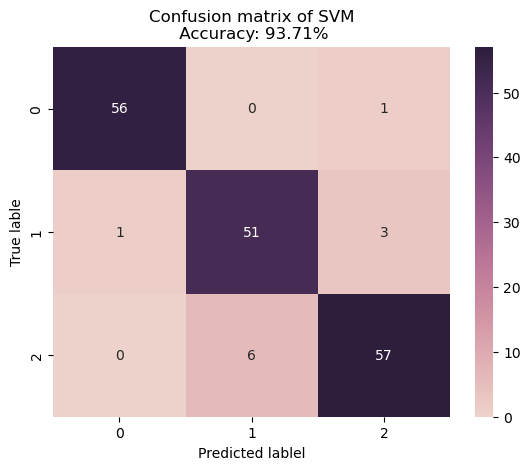

In [49]:
# Classification report
print("Classification Metrics of SVM model:\n")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:0.2f}%")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')*100:0.2f}%")  # Use 'weighted' for 'multi-class' classification
print(f"Recall: {recall_score(y_test, y_pred,  average='weighted')*100:0.2f}%")
print(f"F1 score: {f1_score(y_test, y_pred,  average='weighted')*100:0.2f}%")

# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)
# Plot the CM
sns.heatmap(cm, annot=True, fmt='d',cmap=sns.cubehelix_palette(as_cmap=True))         
plt.title(f'Confusion matrix of SVM\n Accuracy: {accuracy_score(y_test, y_pred)*100:0.2f}%')
plt.xlabel('Predicted lablel')
plt.ylabel('True lable')
plt.show()

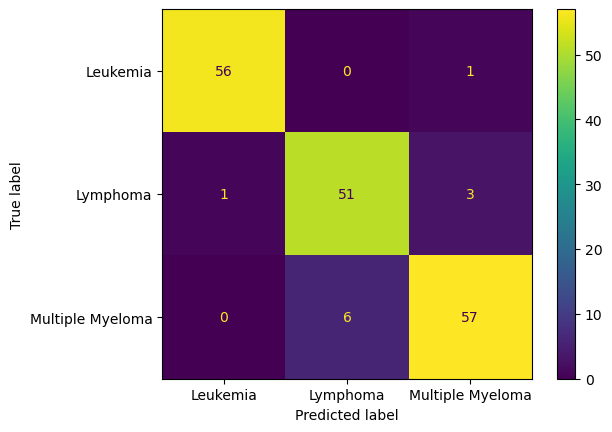

In [45]:
# confusion matriux  plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Leukemia', 'Lymphoma', "Multiple Myeloma"]) # 0:Leukemia, 1: Lymphoma, 2: MM 
disp.plot()
plt.show()